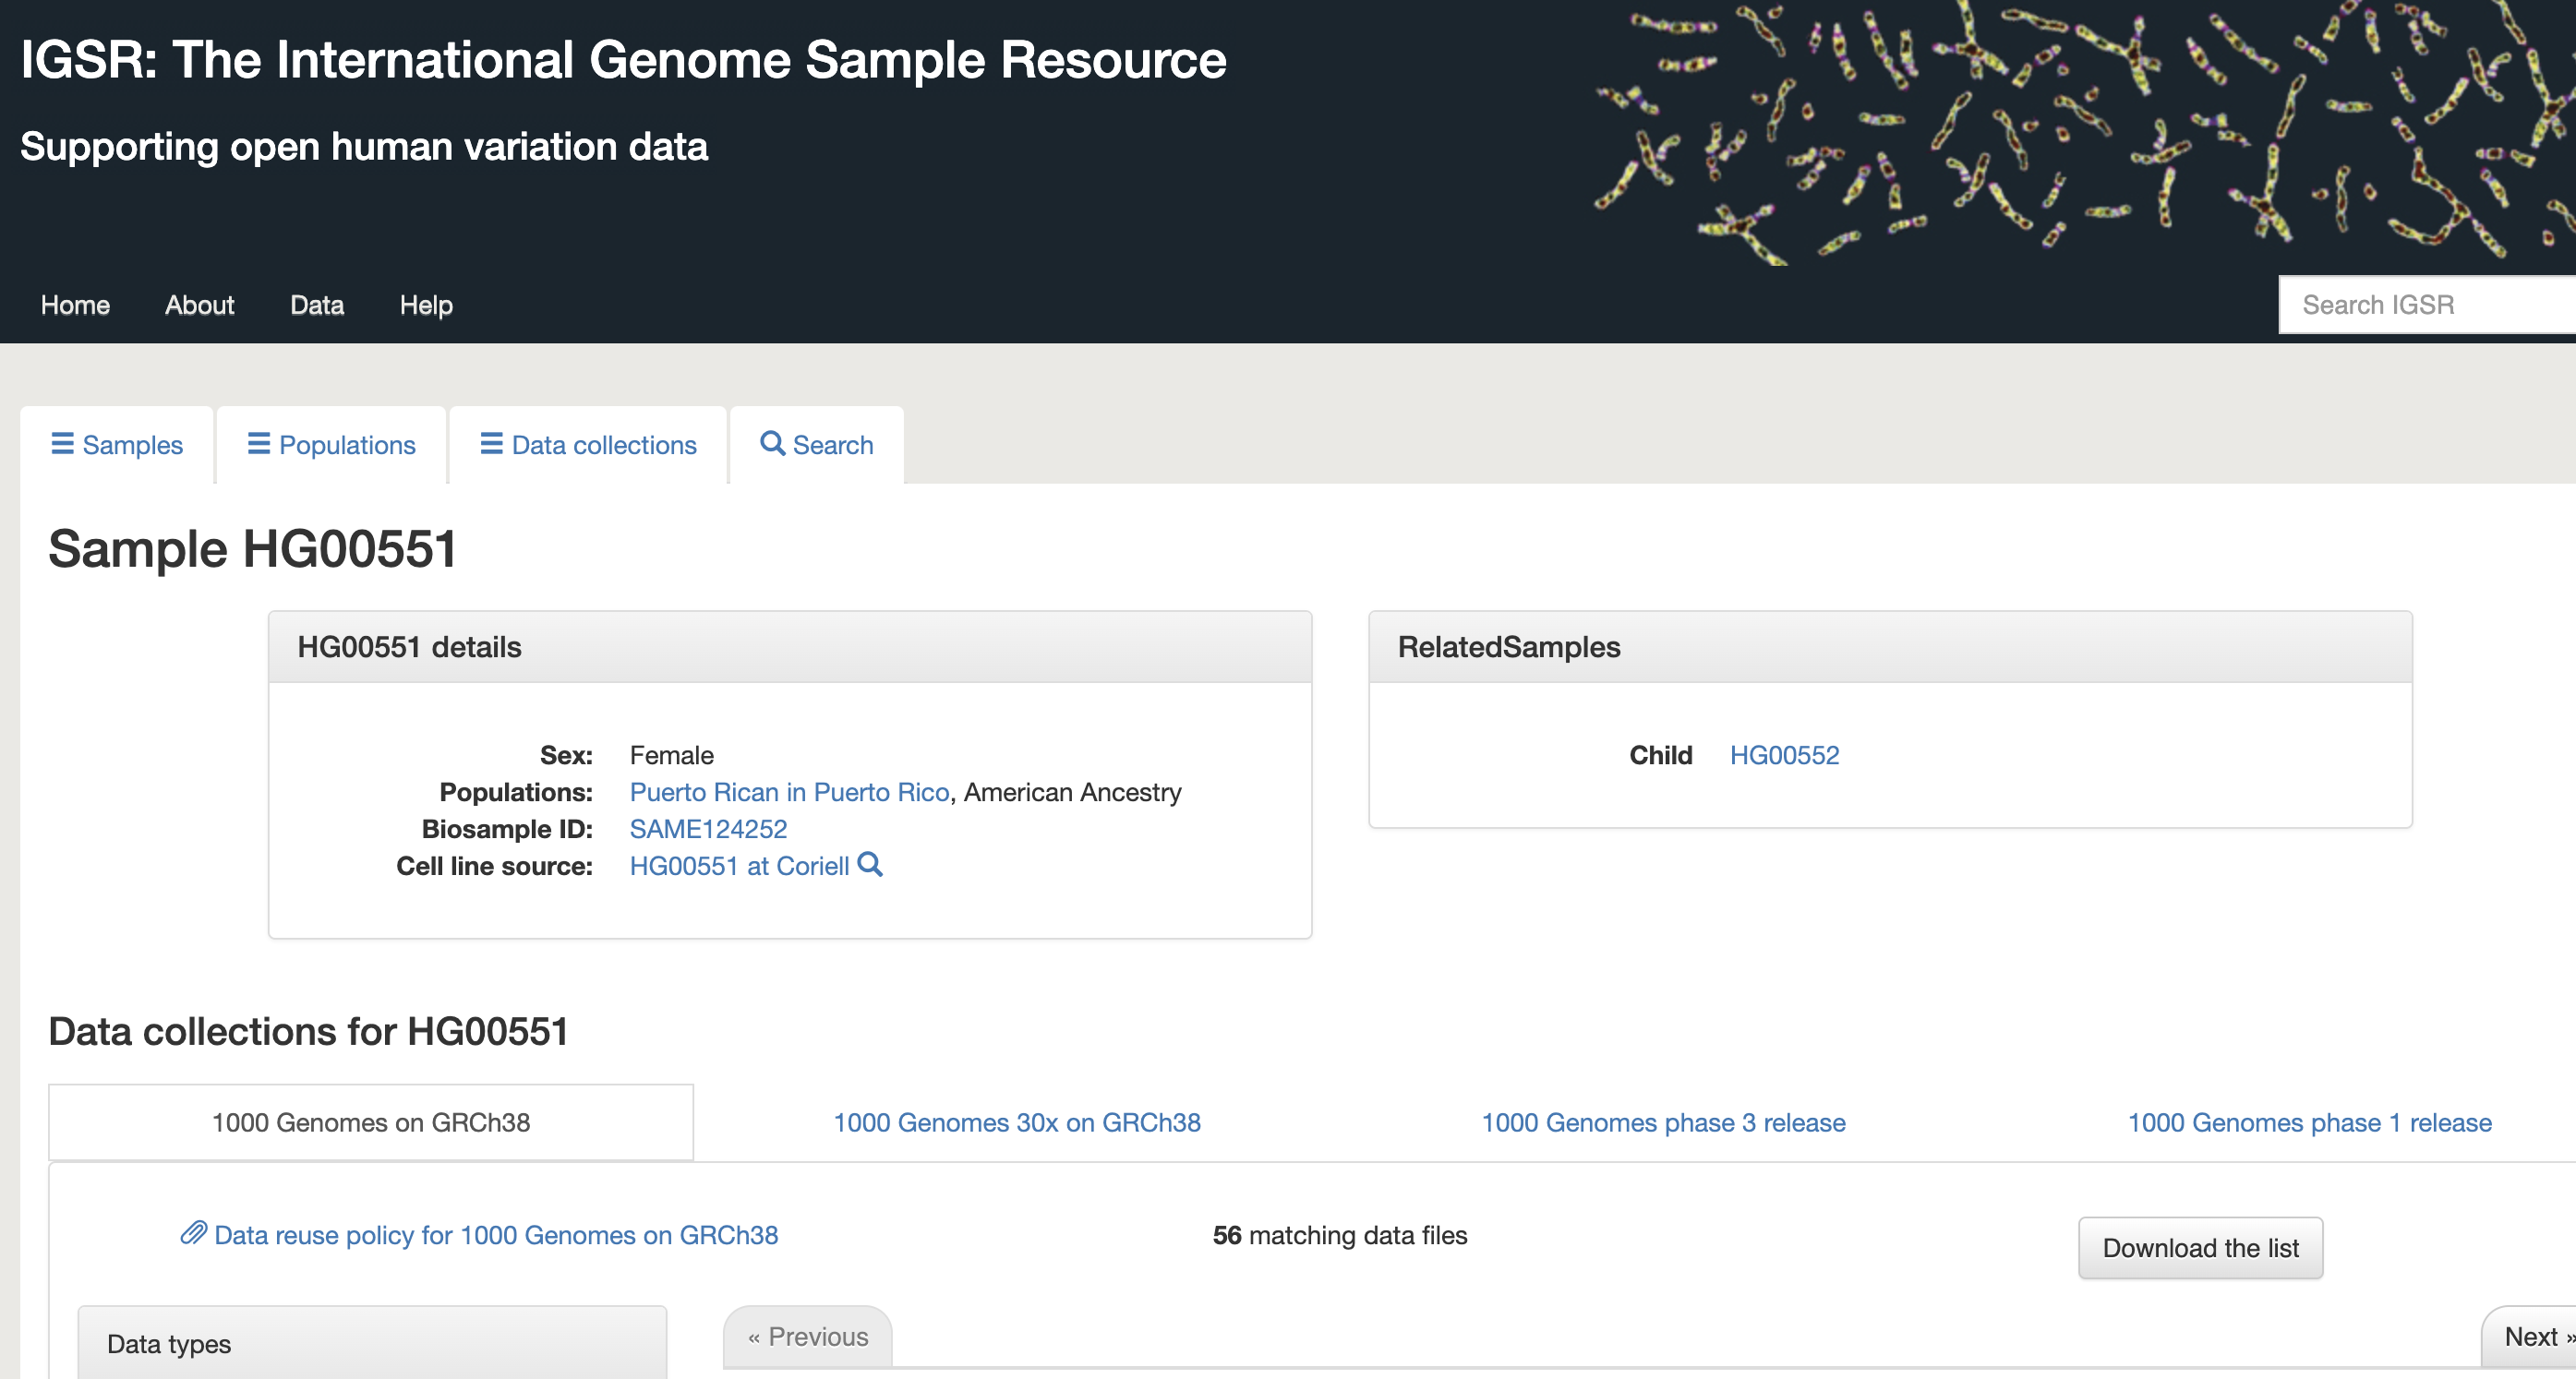

In [1]:
'''
Inidividual ID: HG00551
The genome data is from a Puerto Rican female. 
'''

'\nInidividual ID: HG00551\nThe genome data is from a Puerto Rican female. \n'

In [2]:
'''
This individual has a kid who also participated in the 1000 genome project.
This individual shares American Ancestry.
'''

'''
The majority of the ancestry component for the Puerto Rican population is about 64% European, 21% African, and 
15% Native Taino ( = American Indians). European ancestry is the strongest on the west side of the island while West African ancestry 
is the strongest on the east side, and the levels of Taino ancestry generally highest in the southwest of the island.

Reference: https://en.wikipedia.org/wiki/Puerto_Ricans#Ancestry
'''

'\nThe majority of the ancestry component for the Puerto Rican population is about 64% European, 21% African, and \n15% Native Taino ( = American Indians). European ancestry is the strongest on the west side of the island while West African ancestry \nis the strongest on the east side, and the levels of Taino ancestry generally highest in the southwest of the island.\n\nReference: https://en.wikipedia.org/wiki/Puerto_Ricans#Ancestry\n'

# **2. Exome sequencing**


---

In [3]:
'''
ID: "SRR099988" 
We chose this ID because the ID has a pair of exome sequencing files (more than one file) with the data size of 
4.7GB. The files are the only and largest pair of exome files that we could obtain from this individual's sequencing data repository.
'''

'\nID: "SRR099988" \nWe chose this ID because the ID has a pair of exome sequencing files (more than one file) with the data size of \n4.7GB. The files are the only and largest pair of exome files that we could obtain from this individual\'s sequencing data repository.\n'

In [5]:
'''
Each human has roughly 3 billion base pairs in their whole genome, and exomes take only one percent of those bases.
So, we have 3B*0.01 = 30 million. Since roughly 0.04% of our genomes differ from each other, the estimate of variants
we would see is somewhere around 30M*0.0004 = 12,000. '''

'\nEach human has roughly 3 billion base pairs in their whole genome, and exomes take only one percent of those bases.\nSo, we have 3B*0.01 = 30 million. Since roughly 0.04% of our genomes differ from each other, the estimate of variants\nwe would see is somewhere around 30M*0.0004 = 12,000. '

# **3. Data access**


---

In [4]:
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG00551/sequence_read/SRR099988_1.filt.fastq.gz
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG00551/sequence_read/SRR099988_2.filt.fastq.gz

--2023-10-20 13:30:45--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG00551/sequence_read/SRR099988_1.filt.fastq.gz
           => ‘SRR099988_1.filt.fastq.gz’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.193.167
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.193.167|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/HG00551/sequence_read ... done.
==> SIZE SRR099988_1.filt.fastq.gz ... 5068990873
==> PASV ... done.    ==> RETR SRR099988_1.filt.fastq.gz ... done.
Length: 5068990873 (4.7G) (unauthoritative)

SRR099988_1.filt.fa 100%[===================>]   4.72G  77.6MB/s    in 1m 55s  

2023-10-20 13:32:41 (42.2 MB/s) - ‘SRR099988_1.filt.fastq.gz’ saved [5068990873]

--2023-10-20 13:32:42--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG00551/sequence_read/SRR099988_2.filt.fastq.gz
           => ‘SRR099988_2.filt

In [6]:
!ls -lh ~/scratch/Project/data

total 9.5G
-rw-r--r-- 1 ynitta6 gtperson 4.8G Oct 20 13:32 SRR099988_1.filt.fastq.gz
-rw-r--r-- 1 ynitta6 gtperson 4.8G Oct 20 13:34 SRR099988_2.filt.fastq.gz


In [7]:
#counting reads
!zcat ~/scratch/Project/data/SRR099988_1.filt.fastq.gz | wc -l 
!zcat ~/scratch/Project/data/SRR099988_2.filt.fastq.gz | wc -l

305375480
305375480


In [7]:
'''
We have a paired fastq file (1&2) of SRR099988 .
'''

'\nWe have a paired fastq file (1&2) of SRR099988 .\n'

In [ ]:
'''
"wc -l" command returns 305375480 as the nunber of lines for each file, and we can get the number of reads by dividing the number by 4 
as each read contains four lines. So 305375480/4 = 76343870  reads are present in each fastq file.
'''

# **4. Pre-QC with FastQC**


---

In [18]:
!fastqc --help


            FastQC - A high throughput sequence QC analysis tool

SYNOPSIS

	fastqc seqfile1 seqfile2 .. seqfileN

    fastqc [-o output dir] [--(no)extract] [-f fastq|bam|sam] 
           [-c contaminant file] seqfile1 .. seqfileN

DESCRIPTION

    FastQC reads a set of sequence files and produces from each one a quality
    control report consisting of a number of different modules, each one of 
    which will help to identify a different potential type of problem in your
    data.
    
    If no files to process are specified on the command line then the program
    will start as an interactive graphical application.  If files are provided
    on the command line then the program will run with no user interaction
    required.  In this mode it is suitable for inclusion into a standardised
    analysis pipeline.
    
    The options for the program as as follows:
    
    -h --help       Print this help file and exit
    
    -v --version    Print the version of the program and exit

In [8]:
#Create a directory for QC results.
!mkdir -p ~/scratch/Project/data/fastQCPreQC
!mkdir -p ~/scratch/Project/data/Trimming
!mkdir -p ~/scratch/Project/data/fastQCPostQC

In [9]:
!fastqc -o ~/scratch/Project/data/fastQCPreQC/ ~/scratch/Project/data/SRR099988_1.filt.fastq.gz ~/scratch/Project/data/SRR099988_2.filt.fastq.gz

application/gzip
application/gzip
Started analysis of SRR099988_1.filt.fastq.gz
Approx 5% complete for SRR099988_1.filt.fastq.gz
Approx 10% complete for SRR099988_1.filt.fastq.gz
Approx 15% complete for SRR099988_1.filt.fastq.gz
Approx 20% complete for SRR099988_1.filt.fastq.gz
Approx 25% complete for SRR099988_1.filt.fastq.gz
Approx 30% complete for SRR099988_1.filt.fastq.gz
Approx 35% complete for SRR099988_1.filt.fastq.gz
Approx 40% complete for SRR099988_1.filt.fastq.gz
Approx 45% complete for SRR099988_1.filt.fastq.gz
Approx 50% complete for SRR099988_1.filt.fastq.gz
Approx 55% complete for SRR099988_1.filt.fastq.gz
Approx 60% complete for SRR099988_1.filt.fastq.gz
Approx 65% complete for SRR099988_1.filt.fastq.gz
Approx 70% complete for SRR099988_1.filt.fastq.gz
Approx 75% complete for SRR099988_1.filt.fastq.gz
Approx 80% complete for SRR099988_1.filt.fastq.gz
Approx 85% complete for SRR099988_1.filt.fastq.gz
Approx 90% complete for SRR099988_1.filt.fastq.gz
Approx 95% complete f

In [10]:
!ls ~/scratch/Project/data/fastQCPreQC/ 

SRR099988_1.filt_fastqc.html  SRR099988_2.filt_fastqc.html
SRR099988_1.filt_fastqc.zip   SRR099988_2.filt_fastqc.zip


<div class="alert alert-block alert-warning">
    <h3>4.2 Show <i>per base sequencing quality</i>?</h3>
    <p>Add a screenshot below</p>
</div>

##Add image here for 4.1
For SRR099988_1
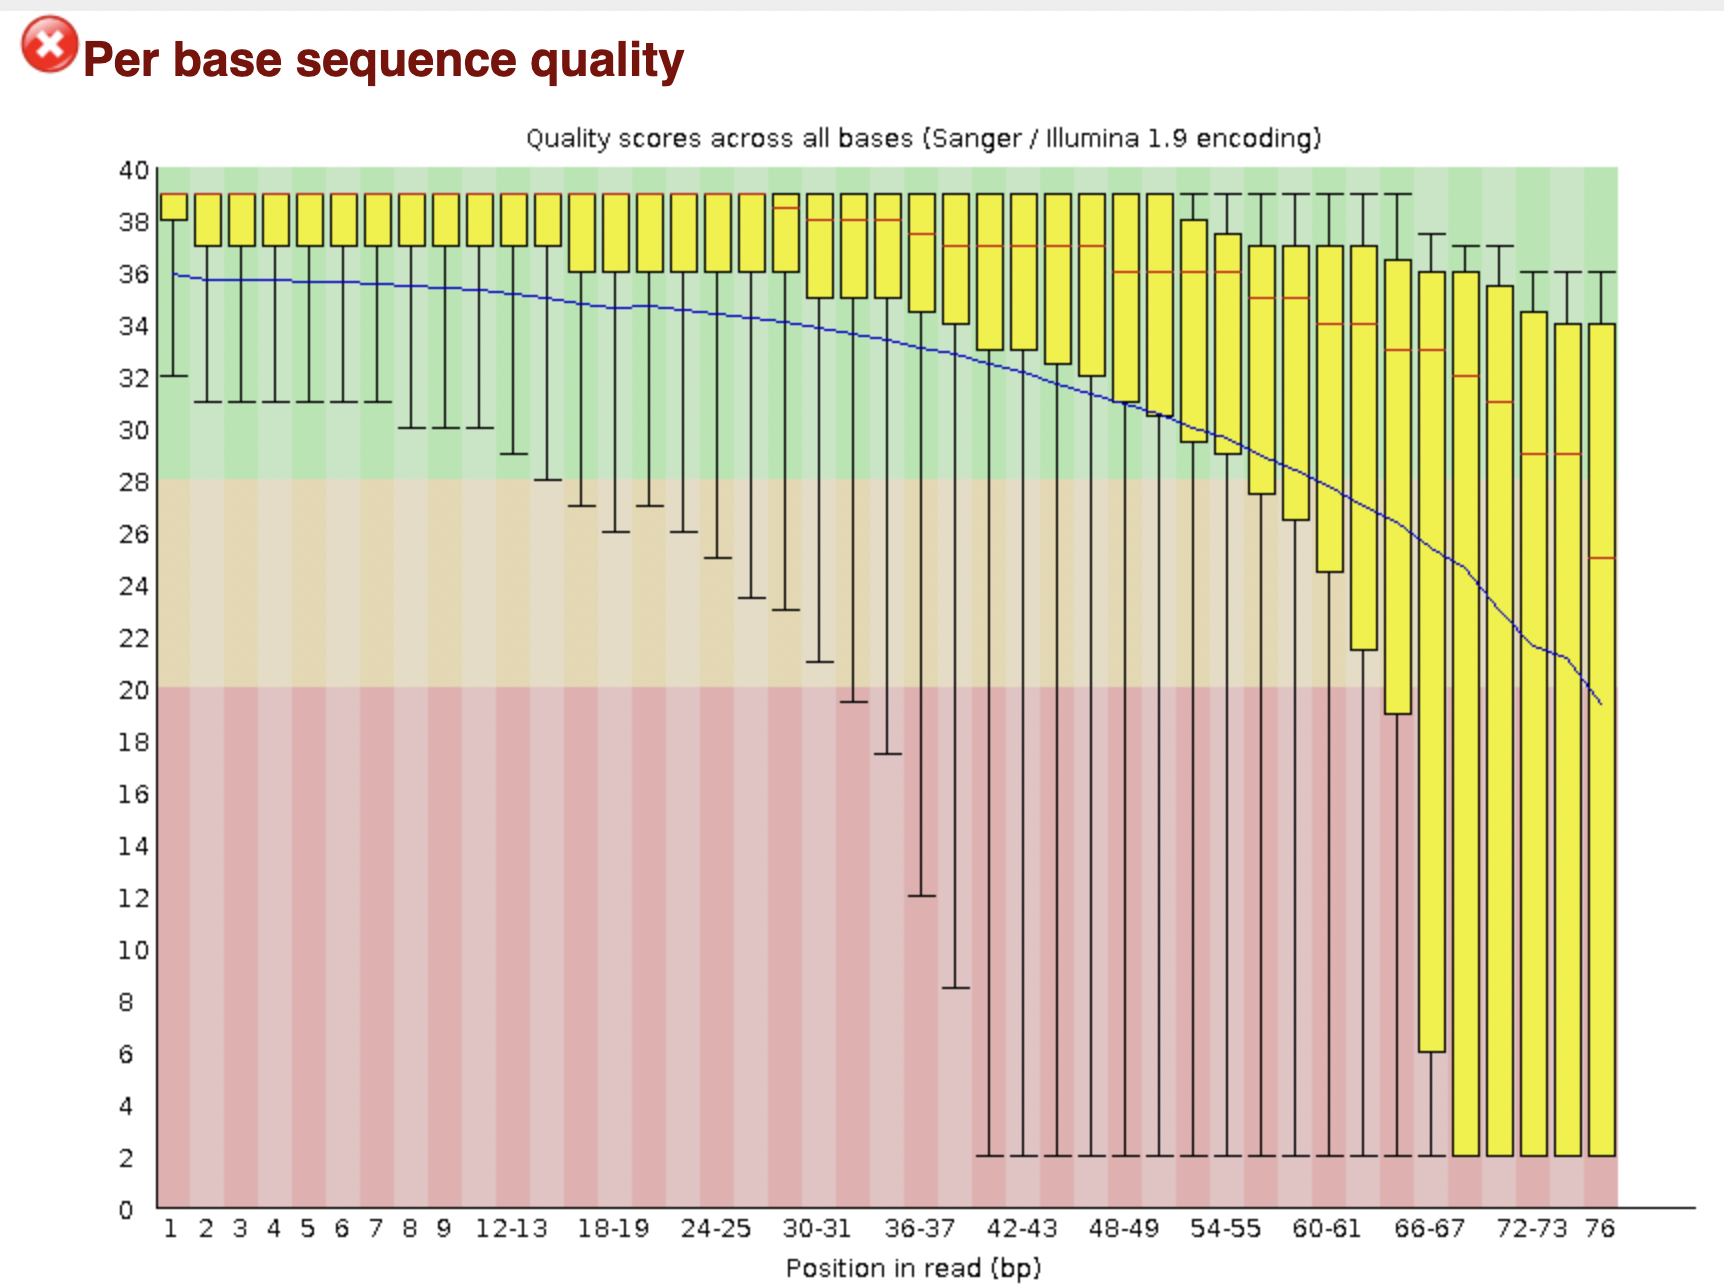

for SRR099988_2
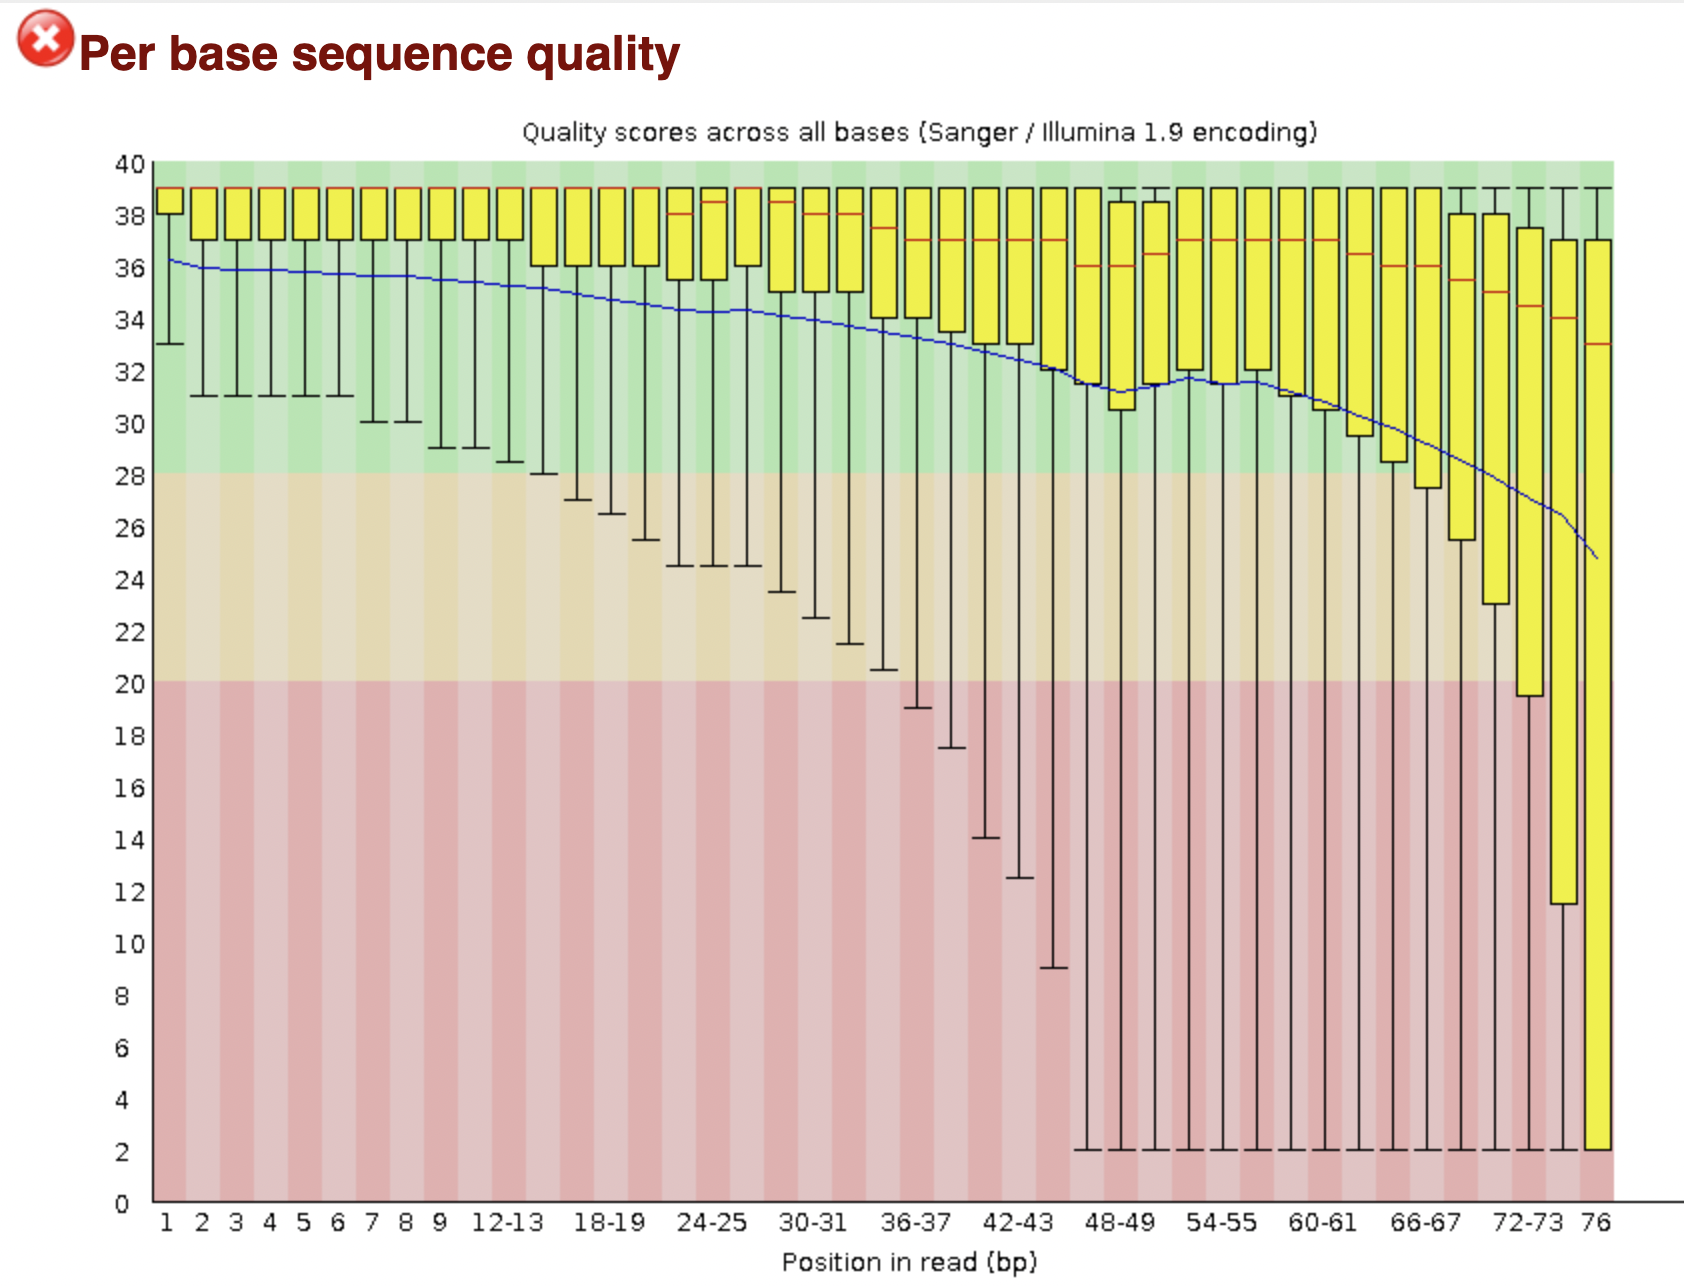


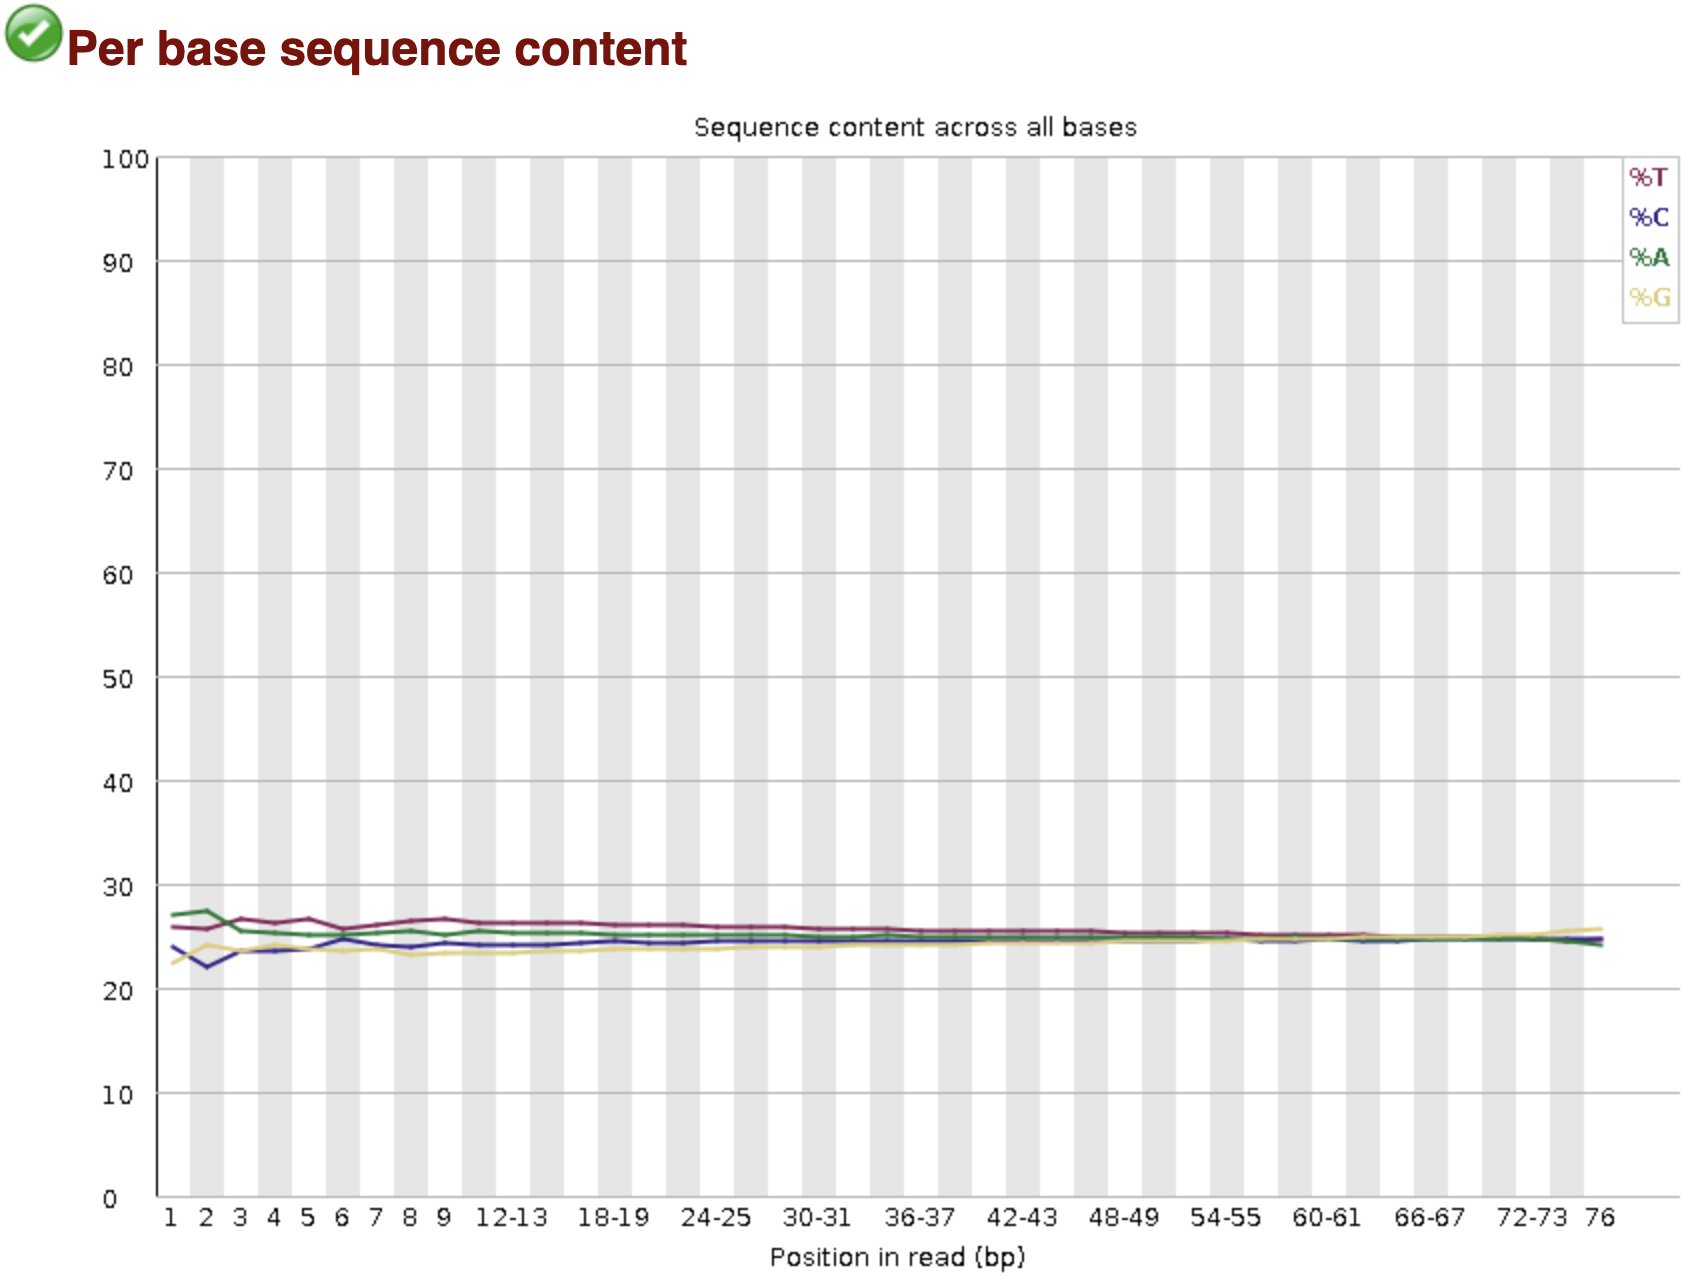

for SRR099988_2
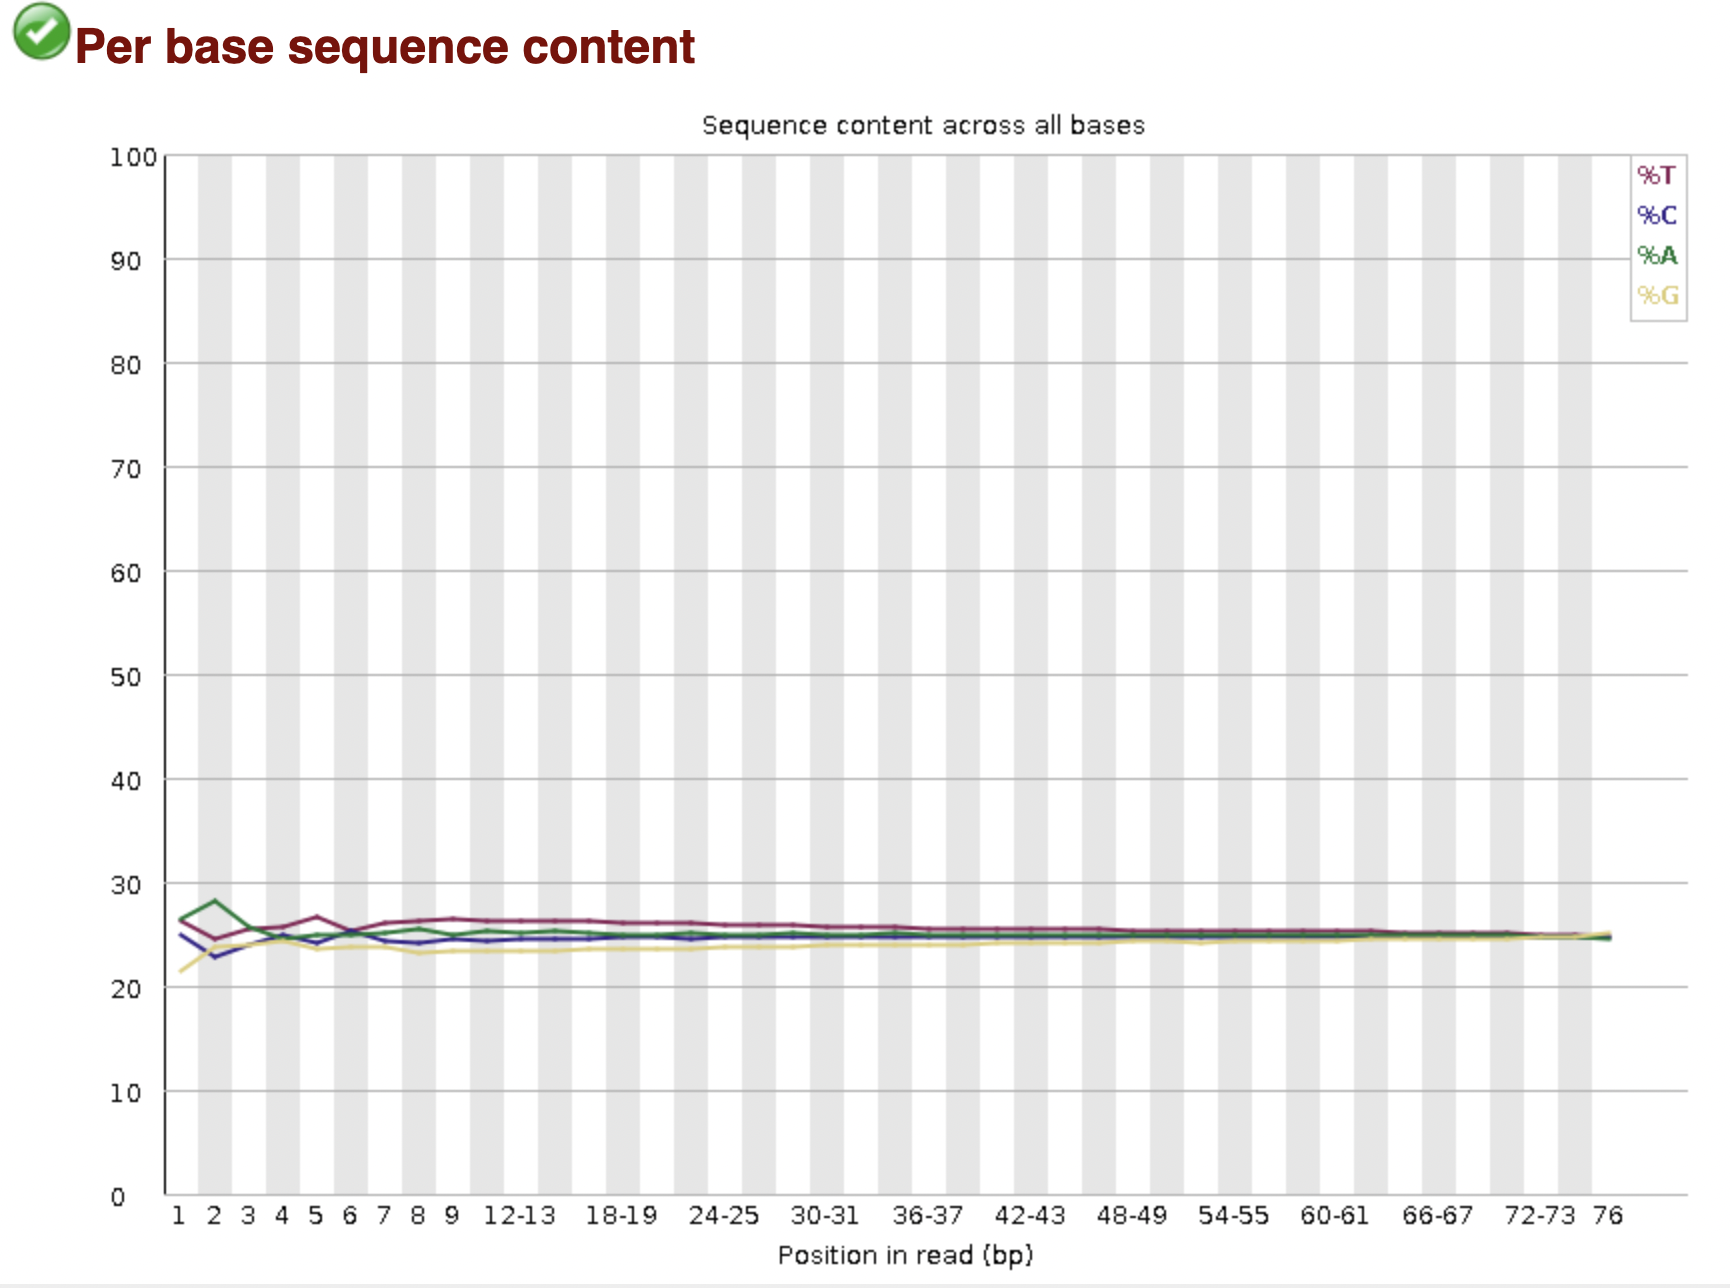

# **5. Trimming with fastp or trimmmomatic**


---

In [5]:
!fastp --help 

usage: fastp [options] ... 
options:
  -i, --in1                            read1 input file name (string [=])
  -o, --out1                           read1 output file name (string [=])
  -I, --in2                            read2 input file name (string [=])
  -O, --out2                           read2 output file name (string [=])
      --unpaired1                      for PE input, if read1 passed QC but read2 not, it will be written to unpaired1. Default is to discard it. (string [=])
      --unpaired2                      for PE input, if read2 passed QC but read1 not, it will be written to unpaired2. If --unpaired2 is same as --unpaired1 (default mode), both unpaired reads will be written to this same file. (string [=])
      --overlapped_out                 for each read pair, output the overlapped region if it has no any mismatched base. (string [=])
      --failed_out                     specify the file to store reads that cannot pass the filters. (string [=])
  -m, --merge  

In [12]:
#Exact command here
'the name of the tool used: fastp'
!fastp -i ~/scratch/Project/data/SRR099988_1.filt.fastq.gz -I ~/scratch/Project/data/SRR099988_2.filt.fastq.gz  -o ~/scratch/Project/data/Trimming/SRR099988_1.Trimmed.fastq.gz -O ~/scratch/Project/data/Trimming/SRR099988_2.Trimmed.fastq.gz -f 10 -t 6




Read1 before filtering:
total reads: 76343870
total bases: 5802134120
Q20 bases: 4923961158(84.8647%)
Q30 bases: 4549554034(78.4117%)

Read2 before filtering:
total reads: 76343870
total bases: 5802134120
Q20 bases: 5090168161(87.7292%)
Q30 bases: 4734115331(81.5927%)

Read1 after filtering:
total reads: 63378464
total bases: 3801931470
Q20 bases: 3640614097(95.757%)
Q30 bases: 3408733711(89.6579%)

Read2 after filtering:
total reads: 63378464
total bases: 3801931470
Q20 bases: 3689868429(97.0525%)
Q30 bases: 3480138349(91.5361%)

Filtering result:
reads passed filter: 126756928
reads failed due to low quality: 25929018
reads failed due to too many N: 1794
reads failed due to too short: 0
reads with adapter trimmed: 1388266
bases trimmed due to adapters: 1789032

Duplication rate: 7.07475%

Insert size peak (evaluated by paired-end reads): 109

JSON report: fastp.json
HTML report: fastp.html

fastp -i /home/hice1/ynitta6/scratch/Project/data/SRR099988_1.filt.fastq.gz -I /home/hice1/yni

In [8]:
'''
For fastq, we used -f 10 -t 6 as parameters to delete as the first 10 reads have inconsistent and highly fluctuating
values for sequence content due to the presence of adapters according to per base sequence content graph. For the 
last 6 reads, we observed 6 tail reads that are reaching to yellow and red regions for per base sequece quality from 
both fastq file. 
As we removed all the concerning reads, there should not be any additional trimming before postQC.
'''

'\nFor fastq, we used -f 10 -t 6 as parameters to delete as the first 10 reads have inconsistent and highly fluctuating\nvalues for sequence content due to the presence of adapters according to per base sequence content graph. For the \nlast 6 reads, we observed 6 tail reads that are reaching to yellow and red regions for per base sequece quality from \nboth fastq file. \nAs we removed all the concerning reads, there should not be any additional trimming before postQC.\n'

In [9]:
#Before trimming: 
''''
SRR099988_1:76343870
SRR099988_2:76343870
'''
#After trimming:
'''
SRR099988_1:63378464 --> 17% of reads losss
SRR099988_2:63378464 --> 17% of reads losss
     
There were no reads that are only present in either file.
'''

'\nSRR099988_1:63378464 --> 17% of reads losss\nSRR099988_2:63378464 --> 17% of reads losss\n     \nThere were no reads that are only present in either file.\n'

# **6. Post-QC with FastQC?**


---

In [1]:
!fastqc -o ~/scratch/Project/data/fastQCPostQC ~/scratch/Project/data/Trimming/SRR099988_1.Trimmed.fastq.gz ~/scratch/Project/data/Trimming/SRR099988_2.Trimmed.fastq.gz

application/gzip
application/gzip
Started analysis of SRR099988_1.Trimmed.fastq.gz
Approx 5% complete for SRR099988_1.Trimmed.fastq.gz
Approx 10% complete for SRR099988_1.Trimmed.fastq.gz
Approx 15% complete for SRR099988_1.Trimmed.fastq.gz
Approx 20% complete for SRR099988_1.Trimmed.fastq.gz
Approx 25% complete for SRR099988_1.Trimmed.fastq.gz
Approx 30% complete for SRR099988_1.Trimmed.fastq.gz
Approx 35% complete for SRR099988_1.Trimmed.fastq.gz
Approx 40% complete for SRR099988_1.Trimmed.fastq.gz
Approx 45% complete for SRR099988_1.Trimmed.fastq.gz
Approx 50% complete for SRR099988_1.Trimmed.fastq.gz
Approx 55% complete for SRR099988_1.Trimmed.fastq.gz
Approx 60% complete for SRR099988_1.Trimmed.fastq.gz
Approx 65% complete for SRR099988_1.Trimmed.fastq.gz
Approx 70% complete for SRR099988_1.Trimmed.fastq.gz
Approx 75% complete for SRR099988_1.Trimmed.fastq.gz
Approx 80% complete for SRR099988_1.Trimmed.fastq.gz
Approx 85% complete for SRR099988_1.Trimmed.fastq.gz
Approx 90% comple

##For SRR099988_1.Trimmed:
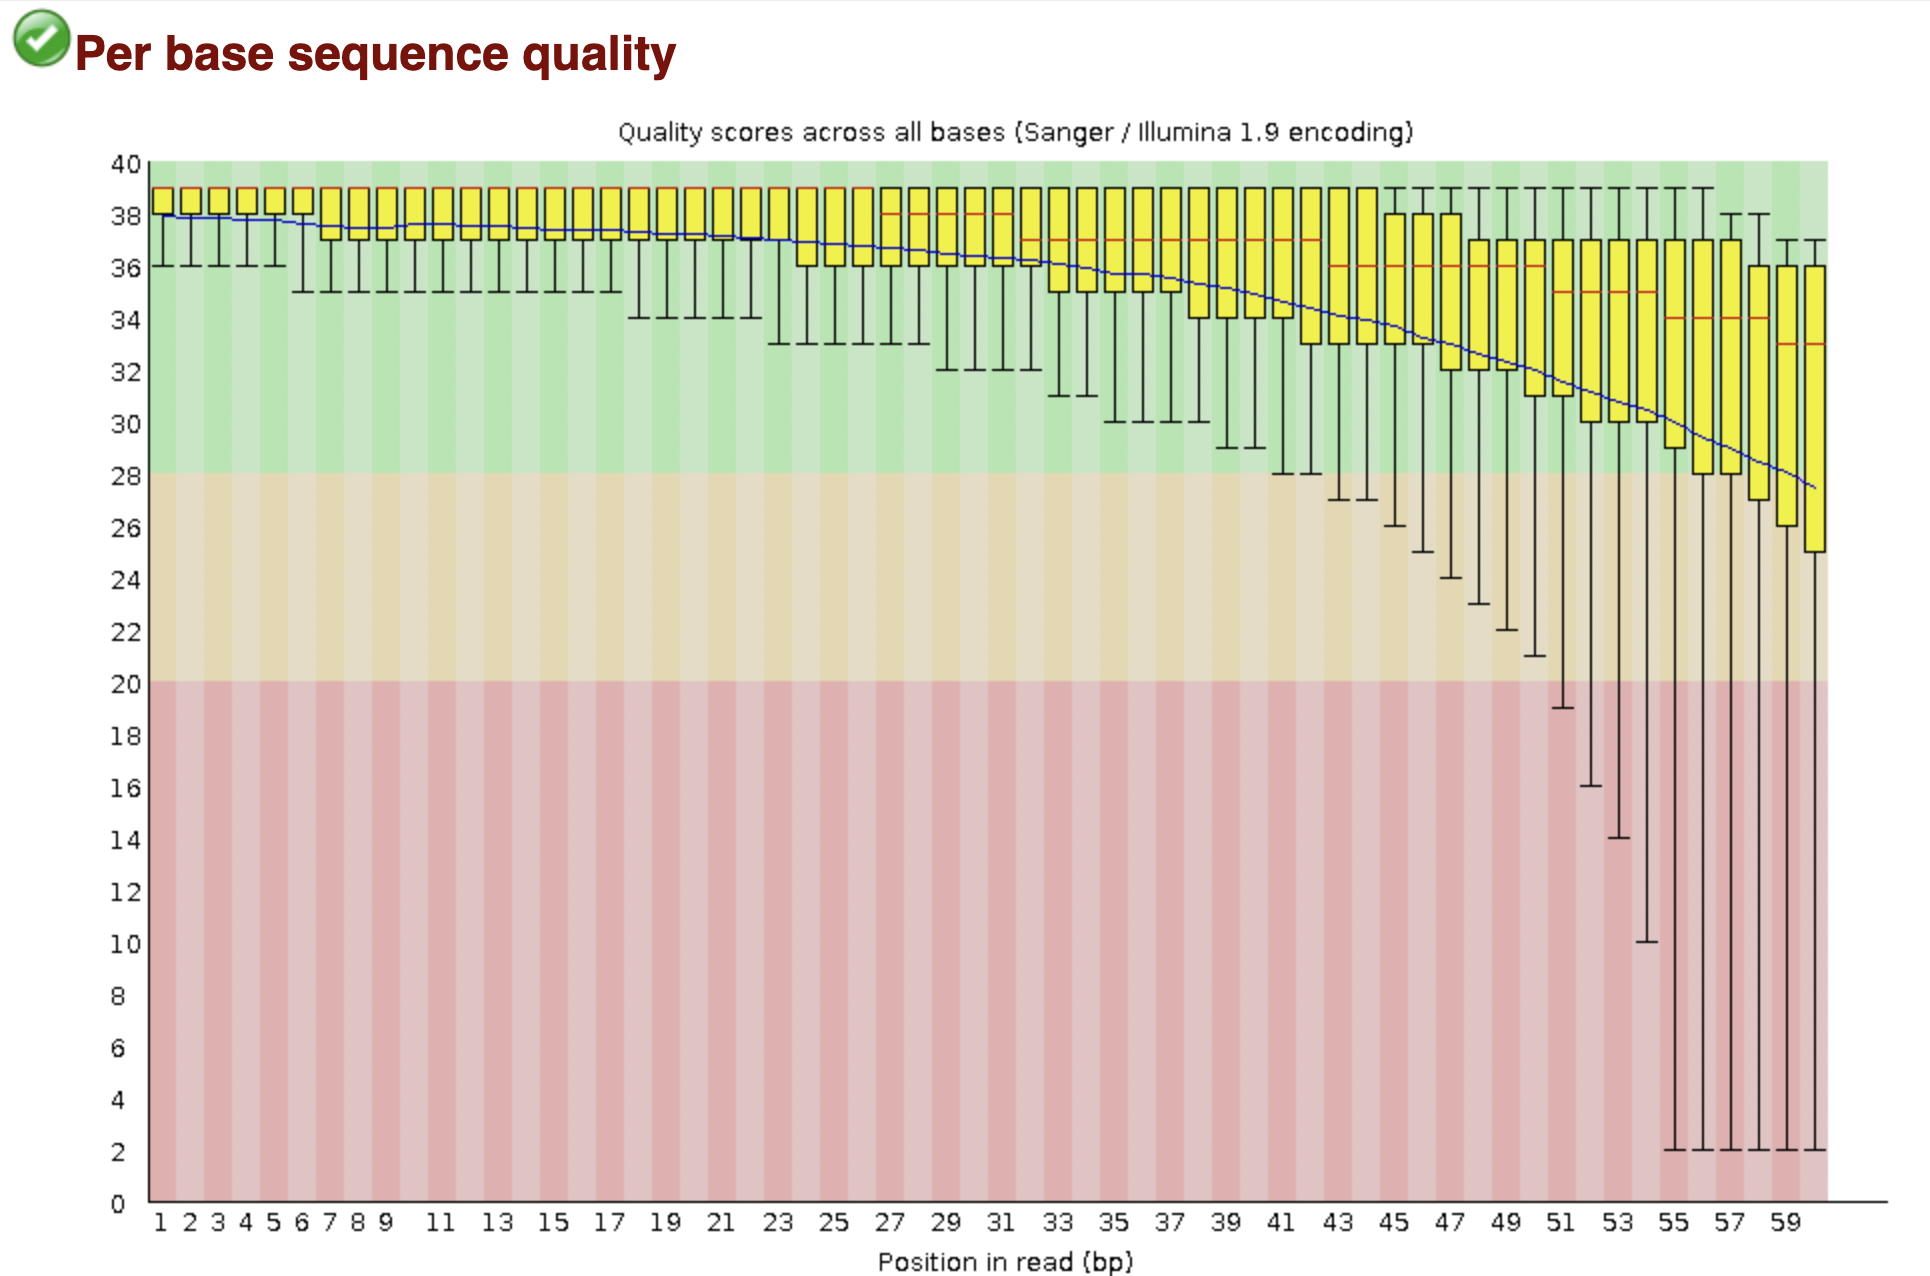

for SRR099988_2.Trimmed:
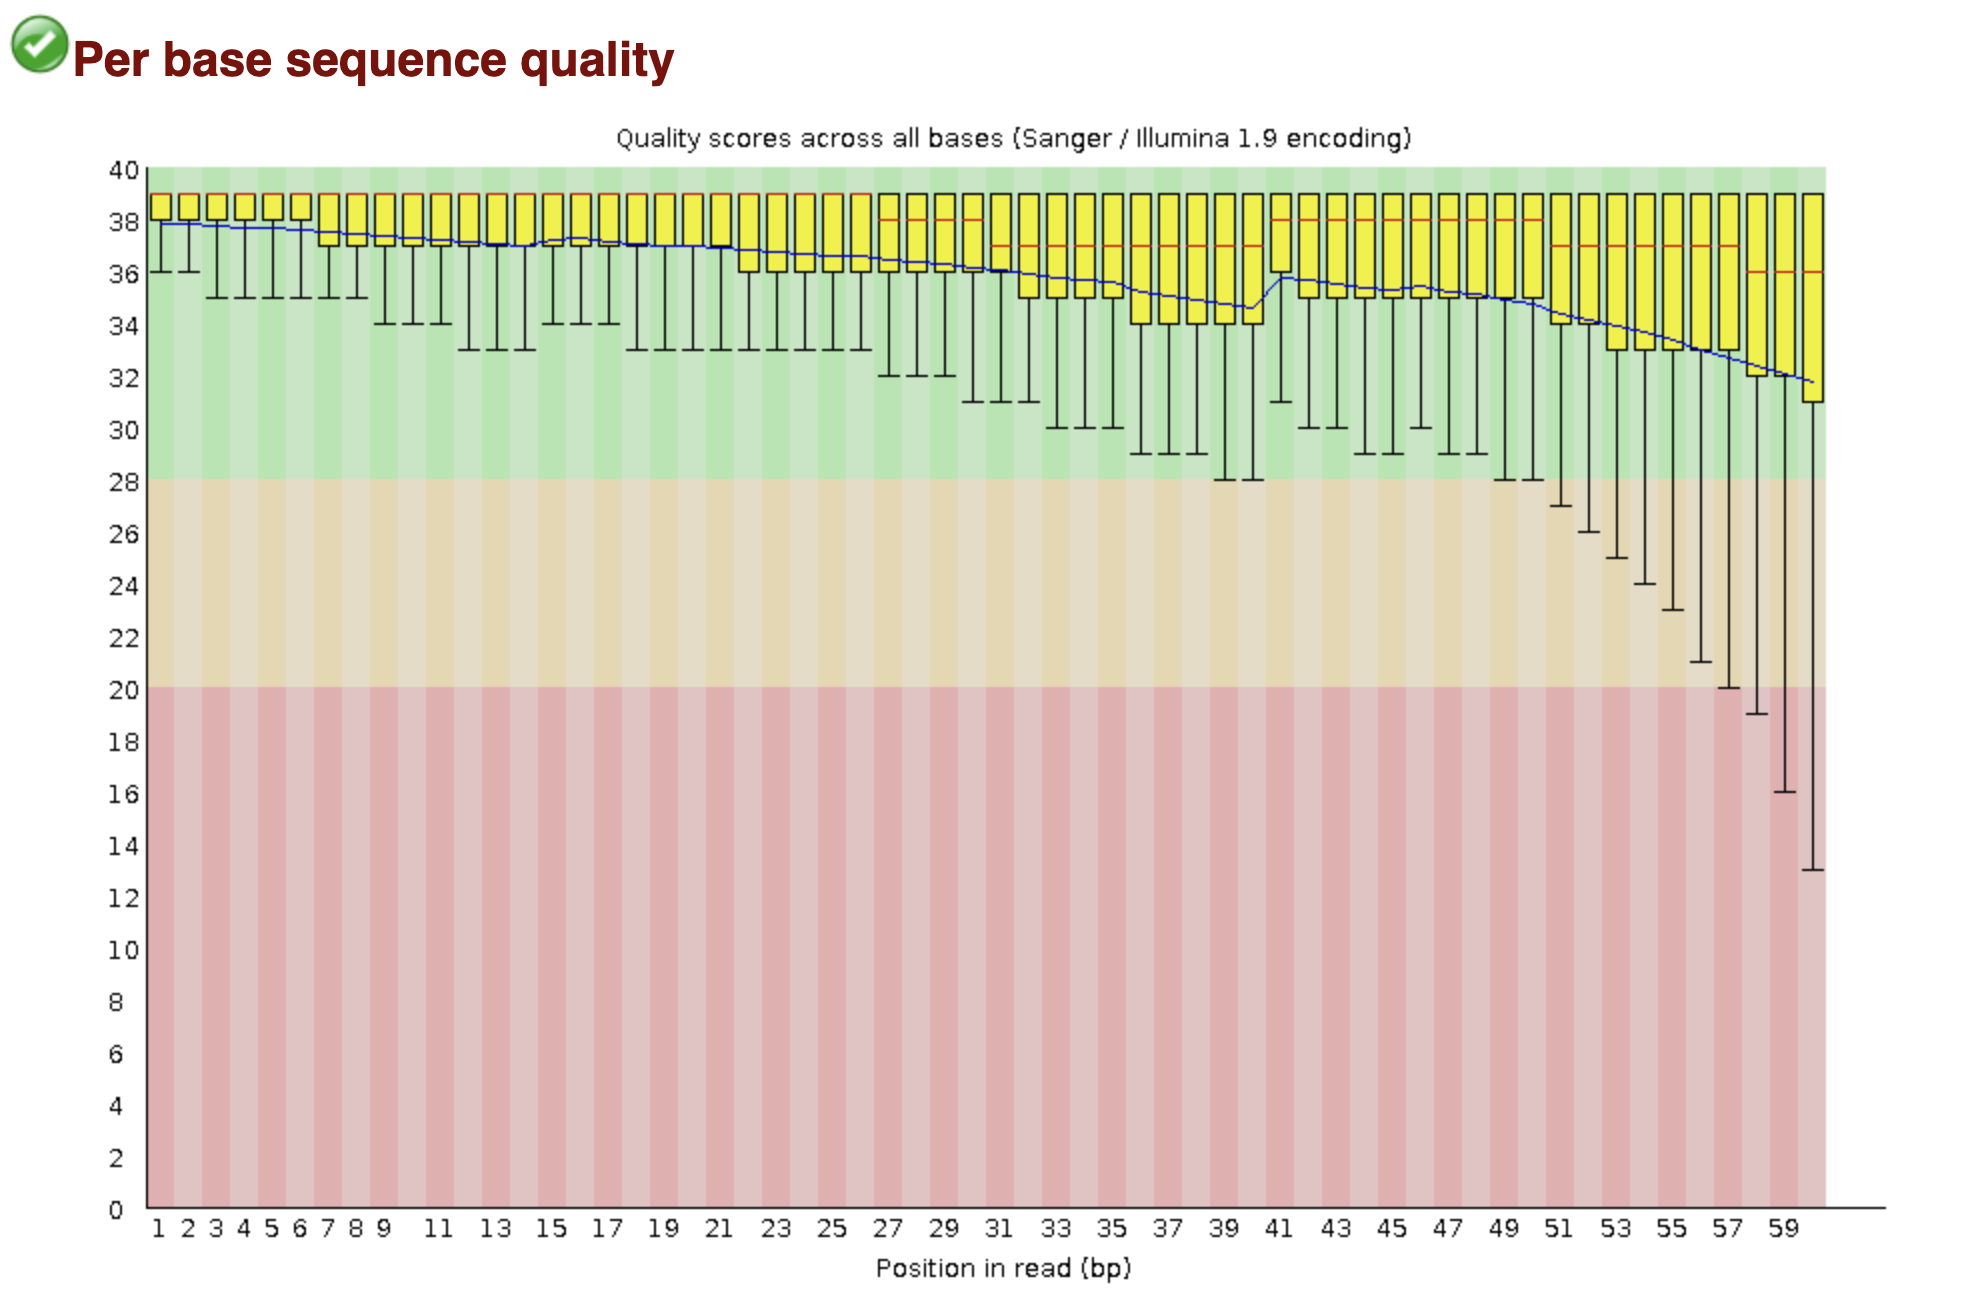

<div class="alert alert-block alert-warning">
    <h3>6.3 Show <i>Per base sequence content</i>?</h3>
    <p>Ideally we shouldn't see adapters at the beginning of the reads in the fastq files. Add a screenshot below</p>
</div>

##Add image here for 6.2
for SRR099988_1.Trimmed:
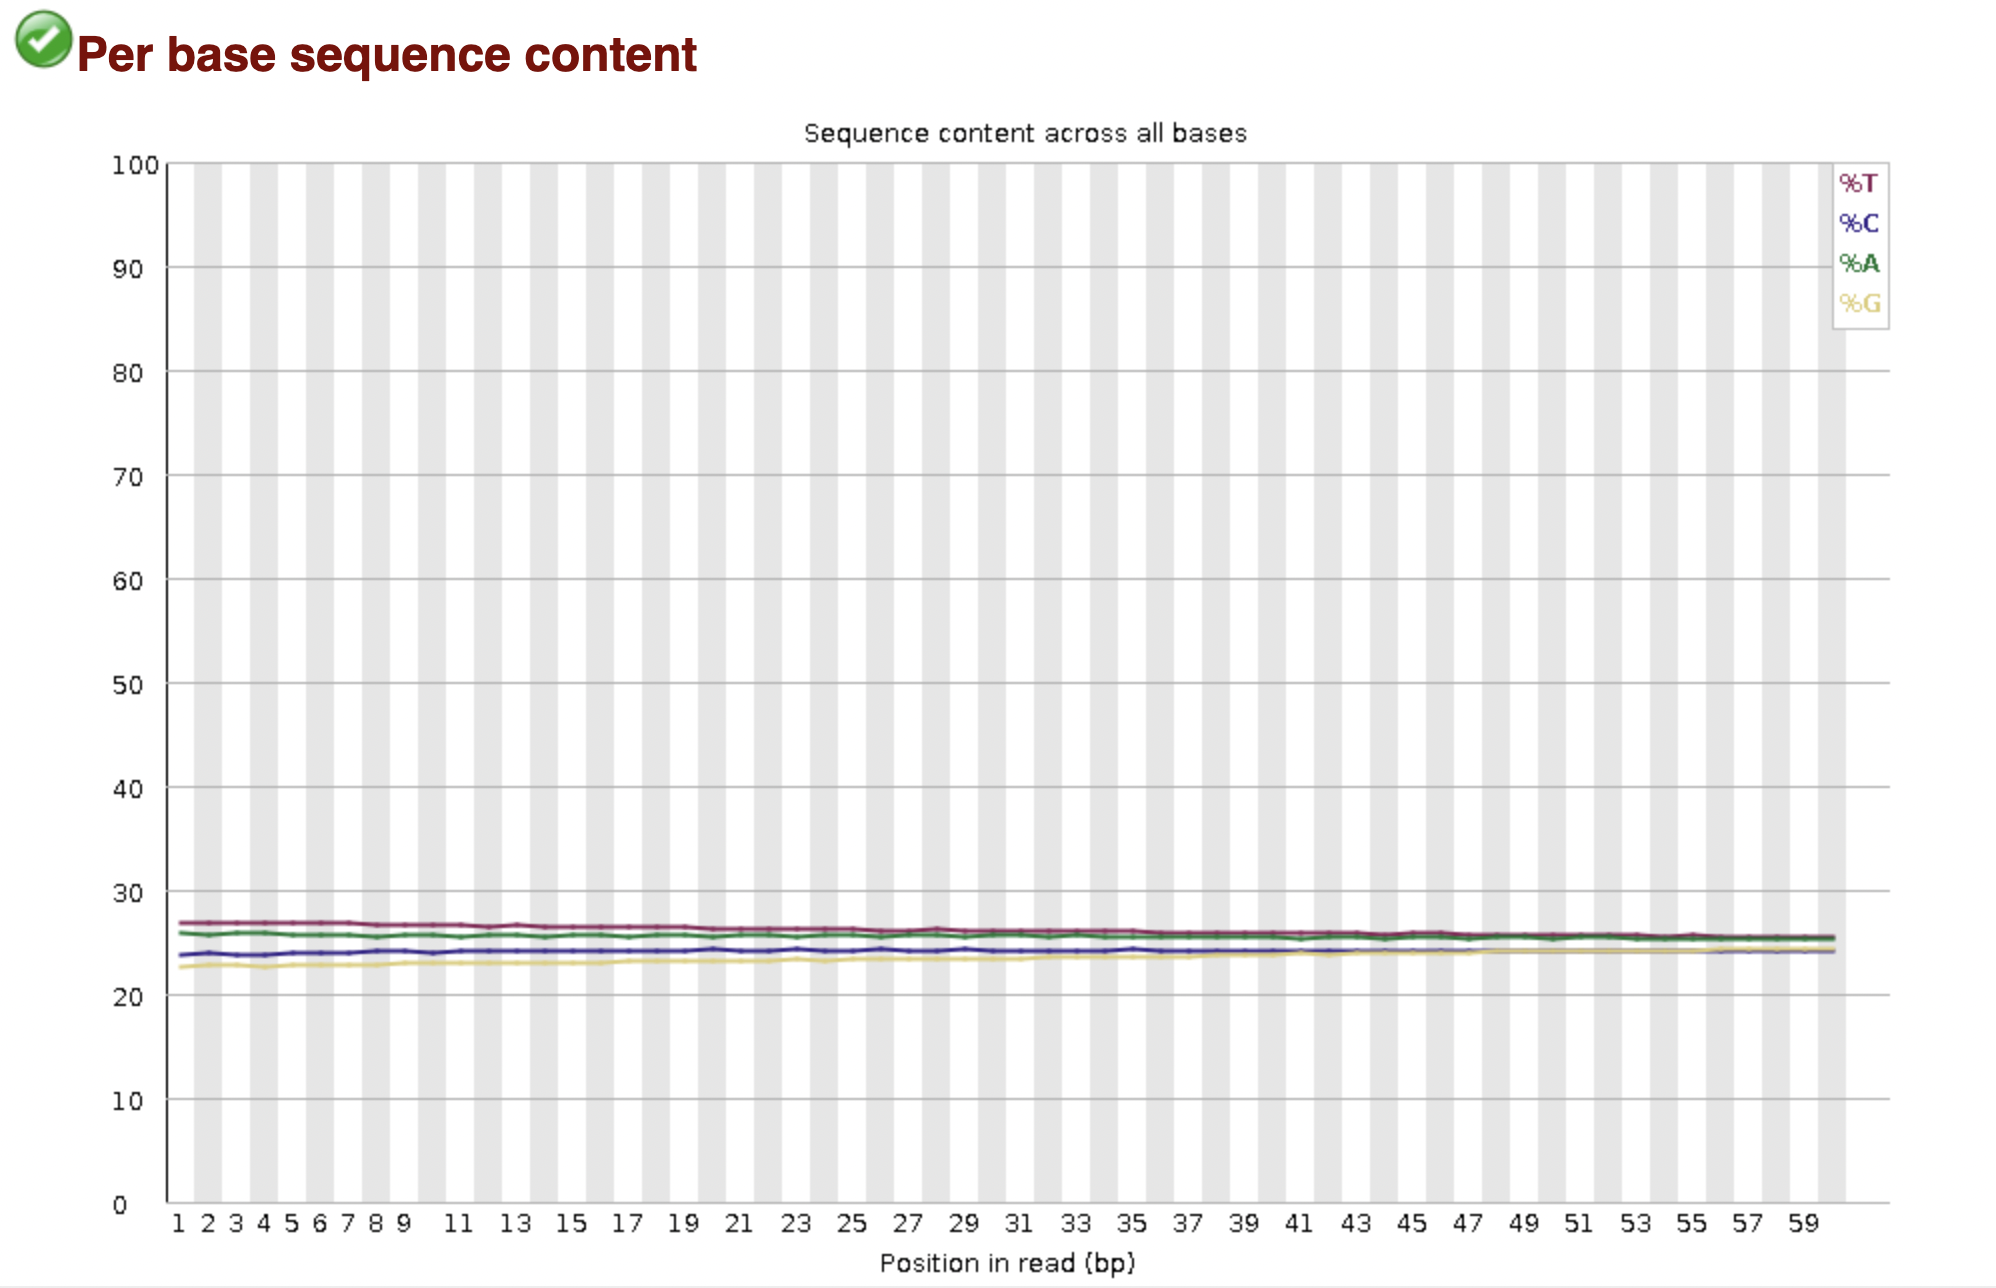

for SRR099988_2.Trimmed:
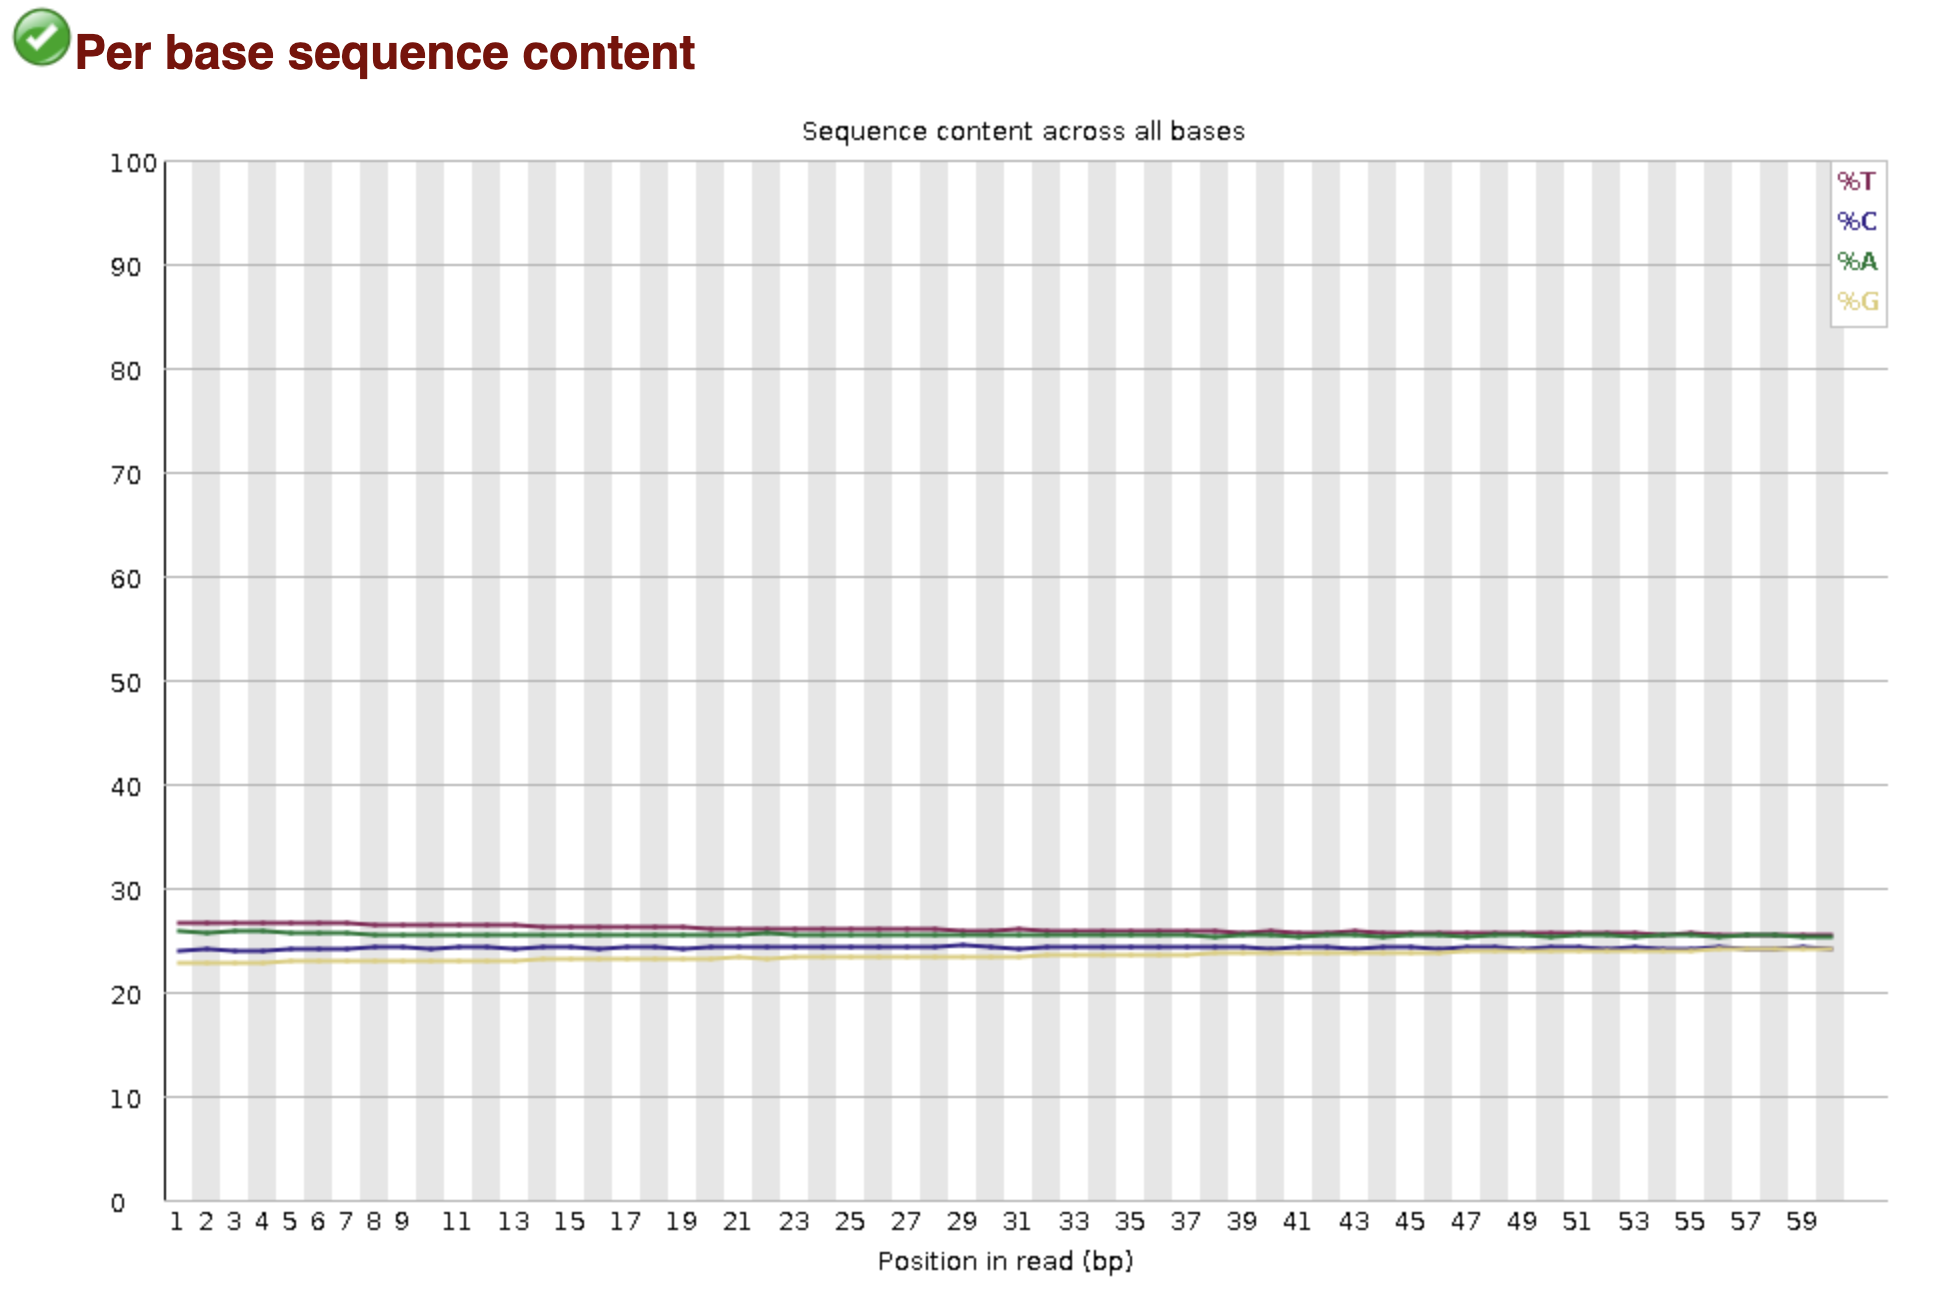